BINARY CLASSIFIFICATION USING VGG19

In [17]:
## In this we develop a binary model using VGG19

In [18]:
## importing required packages

import numpy as np
import matplotlib.pyplot as plt


In [19]:
import cv2

(275, 184, 3)
(256, 256, 3)


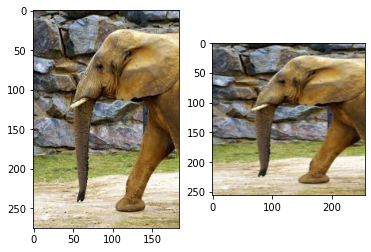

In [20]:
image_1=cv2.imread('/content/drive/MyDrive/dataset/train/African/af_tr10.jpg')


##Original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])

print(image_1.shape)

## resizing the image
image_resize=cv2.resize(image_1,((256,256)))

print(image_resize.shape)

plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])


In [21]:
## finding the paths for train and test data

train_data_path='/content/drive/MyDrive/dataset/train'
test_data_path='/content/drive/MyDrive/dataset/test'

In [22]:
## Making image into linear format using tensorflow framework ImageDataDegenator

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
preprocess_train=ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.4,
                                    vertical_flip=True,
                                    horizontal_flip=True)

preprocess_test=ImageDataGenerator(rescale=1./255)

                                  
                              

In [24]:
labels=['African','Asian']

In [25]:
train_data=preprocess_train.flow_from_directory(train_data_path,target_size=[256,256],classes=labels,class_mode='binary',batch_size=32)

Found 840 images belonging to 2 classes.


In [26]:
test_data=preprocess_test.flow_from_directory(test_data_path,target_size=[256,256],classes=labels,class_mode='binary',batch_size=32)

Found 188 images belonging to 2 classes.


In [27]:
## instead of using our own custom model so im taking vgg19

In [28]:
from tensorflow.keras.applications.vgg19 import VGG19

In [29]:
image_size=[256,256]

In [30]:
sol=VGG19(input_shape=image_size +[3],weights='imagenet',include_top=False)

In [31]:
## making not to update the weights of vgg19:

for i in sol.layers:
  i.trainable=False

In [32]:
from tensorflow.keras.layers import Flatten

In [33]:
## developing my own output layer:
y=Flatten()(sol.output)

In [34]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [35]:
from keras.api._v2.keras import activations
final=Dense(1,activation='sigmoid')(y)

In [36]:
from tensorflow.keras.models import Model

In [37]:
vgg19_model=Model(sol.inputs,final)

In [38]:
vgg19_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [39]:
vgg19_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [41]:
vgg19_model.fit(train_data, epochs=50)

Epoch 1/50
27/27 [==============================] - 17s 613ms/step - loss: 0.4755 - Accuracy: 0.7679
Epoch 2/50
27/27 [==============================] - 17s 619ms/step - loss: 0.4729 - Accuracy: 0.7738
Epoch 3/50
27/27 [==============================] - 17s 618ms/step - loss: 0.4536 - Accuracy: 0.7940
Epoch 4/50
27/27 [==============================] - 17s 630ms/step - loss: 0.5875 - Accuracy: 0.7083
Epoch 5/50
27/27 [==============================] - 17s 631ms/step - loss: 0.5054 - Accuracy: 0.7512
Epoch 6/50
27/27 [==============================] - 17s 617ms/step - loss: 0.4765 - Accuracy: 0.7607
Epoch 7/50
27/27 [==============================] - 17s 614ms/step - loss: 0.4218 - Accuracy: 0.8000
Epoch 8/50
27/27 [==============================] - 17s 618ms/step - loss: 0.4911 - Accuracy: 0.7536
Epoch 9/50
27/27 [==============================] - 16s 606ms/step - loss: 0.4652 - Accuracy: 0.7940
Epoch 10/50
27/27 [==============================] - 18s 647ms/step - loss: 0.4195 - Accura

In [42]:
## checking with test data

In [43]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [44]:
y_test_pred = vgg19_model.predict(test_data)

6/6 [==============================] - 87s 17s/step


In [45]:
c = []

for i in y_test_pred:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)

In [46]:
c

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0]

In [47]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [48]:
accuracy_score(test_data.classes , c)

0.5212765957446809

In [49]:
confusion_matrix(test_data.classes , c)

array([[48, 49],
       [41, 50]])

In [50]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.54      0.49      0.52        97
           1       0.51      0.55      0.53        91

    accuracy                           0.52       188
   macro avg       0.52      0.52      0.52       188
weighted avg       0.52      0.52      0.52       188



In [52]:
## checking with own data

In [54]:
def image_pred(path):
  image = cv2.imread(path)
  image = cv2.resize(image , (256,256))
  image = np.array(image) / 255.0
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  result = vgg19_model.predict(image)
  print(result)
  if result > 0.5:
    print('Asian')
  else:
    print('African')
  img = plt.imread(path)
  plt.imshow(img)

(1, 256, 256, 3)
1/1 [==============================] - 1s 1s/step
[[0.06135466]]
African


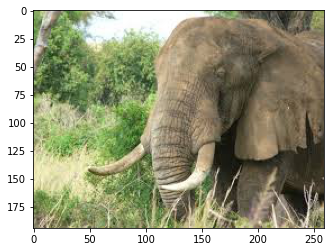

In [55]:
image_pred('/content/drive/MyDrive/dataset/test/African/af_te10.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 23ms/step
[[0.57041496]]
Asian


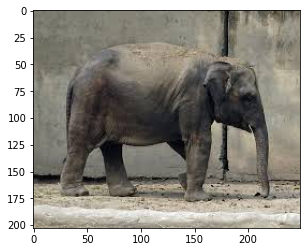

In [56]:
image_pred('/content/drive/MyDrive/dataset/test/Asian/as_te10.jpg')